## Hatched shading

In [1]:
import earthkit.data
import earthkit.maps

In [2]:
data = earthkit.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/efi.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,10fgi,surface,0,20200917,1200,12-36,efi,0,regular_ll
1,ecmf,2ti,surface,0,20200917,1200,12-36,efi,0,regular_ll
2,ecmf,tpi,surface,0,20200917,1200,12-36,efi,0,regular_ll


In [3]:
fgi = data.sel(shortName="10fgi")
tpi = data.sel(shortName="tpi")

In [4]:
from earthkit.maps.styles import Hatched

LEVELS = [0.6, 0.8, 1.0]
HATCHES = ["."*5, "o"*5]

fgi_style = Hatched(
    colors="magenta",
    levels=LEVELS,
    hatches=HATCHES,
    legend_style="disjoint",
)

tpi_style = Hatched(
    colors="green",
    levels=LEVELS,
    hatches=HATCHES,
    legend_style="disjoint",
)

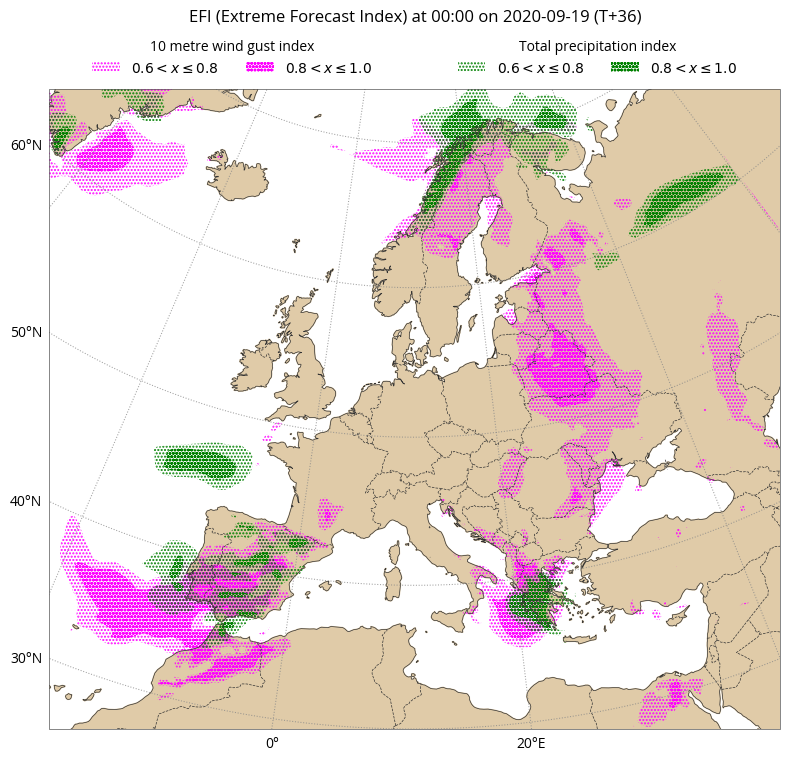

In [ ]:
chart = earthkit.maps.Chart(domain=(-18, 40, 30, 72))

chart.plot(fgi, style=fgi_style)
chart.plot(tpi, style=tpi_style)

chart.coastlines()
chart.borders()
chart.land()
chart.gridlines()

chart.title("EFI (Extreme Forecast Index) at {time:%H:%M} on {time:%Y-%m-%d} (T+{lead_time})")

chart.legend(label="{variable_name}", location=["top left", "top right"], ncols=2)

chart.show()